# Script to generate networks from the Harry Potter movie scripts

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from fa2 import ForceAtlas2

In [2]:
tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [30]:
characters = set(json.loads(open("../characters.json").read().decode("utf-8").lower()))

In [31]:
characterDict = defaultdict(set)

In [32]:
for character in characters:
    names = character.split(" ")
    if len(names) < 4 and "family" not in character:
        for name in names:
            characterDict[name].add(character)
            

In [33]:
for key, value in characterDict.iteritems():
    if len(value) > 1:
        print key, value

lord set([u'dark lord', u'lord palmerston', u'lord stoddard withers', u'lord north', u'lord voldemort'])
wilfred set([u'wilfred elphick', u'wilfred the wistful'])
elfrida set([u'elfrida cragg', u'elfrida clagg'])
herbert set([u'herbert beery', u'herbert chorley', u'sir herbert varney', u'herbert burke'])
nobby set([u'uncle nobby', u'nobby leach'])
poppy set([u'poppy', u'poppy pomfrey'])
creevey set([u'dennis creevey', u'colin creevey', u'mr. creevey'])
crouch set([u'barty crouch jr.', u'caspar crouch', u'mrs. crouch', u'barty crouch sr.'])
borgin set([u'mr. borgin', u'borgin'])
picquery set([u'lucas picquery', u'seraphina picquery'])
mcgonagall, set([u'robert mcgonagall, reverend', u'robert mcgonagall, jr.'])
scrimgeour set([u'brutus scrimgeour', u'rufus scrimgeour'])
henry set([u'henry "harry" potter', u'henry shaw jr.', u'king henry vi', u'henry shaw', u'henry'])
trelawney set([u'sybill trelawney', u'cassandra trelawney'])
fudge set([u'cornelius fudge', u'mrs fudge', u'rufus fudge'])

In [34]:
jsonData = dict()

for key, value in characterDict.iteritems():
    jsonData[key] = list(value)

In [35]:
type(jsonData["potter"])

list

In [39]:
with open('data.json', 'w') as outfile:
    json.dump(jsonData, outfile)

In [37]:
characterDict["albus"]

{u'albus dumbledore', u'albus potter'}

In [11]:
script = open("../movieScripts/(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt","r").read().decode("utf-8")

In [12]:
scenes = defaultdict(set)

In [13]:
regex = re.compile(r"\n(\d+[A-Z]?)[^\.]?\n(.+?)(?=\n\d+[A-Z]?[^\.]?\n?)", re.MULTILINE | re.DOTALL| re.UNICODE)

In [14]:
matches = regex.finditer(script)

In [15]:
for match in matches:
    sceneId = match.group(1)
    dialog = match.group(2).lower()
    tokens = tokenizer.tokenize(dialog)
    for token in tokens:
        scenes[sceneId].add(token)

In [16]:
blacklist = set()
for character in characters:
    names = character.split(" ")
    if len(names) >= 4:
        blacklist.add(character)
    

In [17]:
blacklist.add(u'vernon dudley')

In [18]:
characters = characters.difference(blacklist)

In [19]:
occurrences = defaultdict(set)

In [20]:
for scene, dialog in scenes.iteritems():
    for character in characters:
        names = character.split(" ")
        for name in names:
            if name not in ["the", "of","in" , "through", "aunt", "uncle", "i", "ii", "school", "mr.", "mrs.", "wizard", "sir", "witch", "welcome", "dark", "lord", "children", "two", "one", "bloody"]:
                if name in dialog:
                    occurrences[scene].add(character)

In [21]:
G = nx.Graph()

In [22]:
for scene, characters in occurrences.iteritems():
    for character in characters:
        for other in characters:
            if character != other:
                G.add_edge(character, other)
    

In [23]:
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=100.0,
    gravity=1,
    strongGravityMode=False
)

In [24]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

100%|██████████| 1000/1000 [00:02<00:00, 358.22it/s]

('BarnesHut Approximation', ' took ', '0.88', ' seconds')
('Repulsion forces', ' took ', '1.15', ' seconds')
('Gravitational forces', ' took ', '0.02', ' seconds')
('Attraction forces', ' took ', '0.38', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.09', ' seconds')


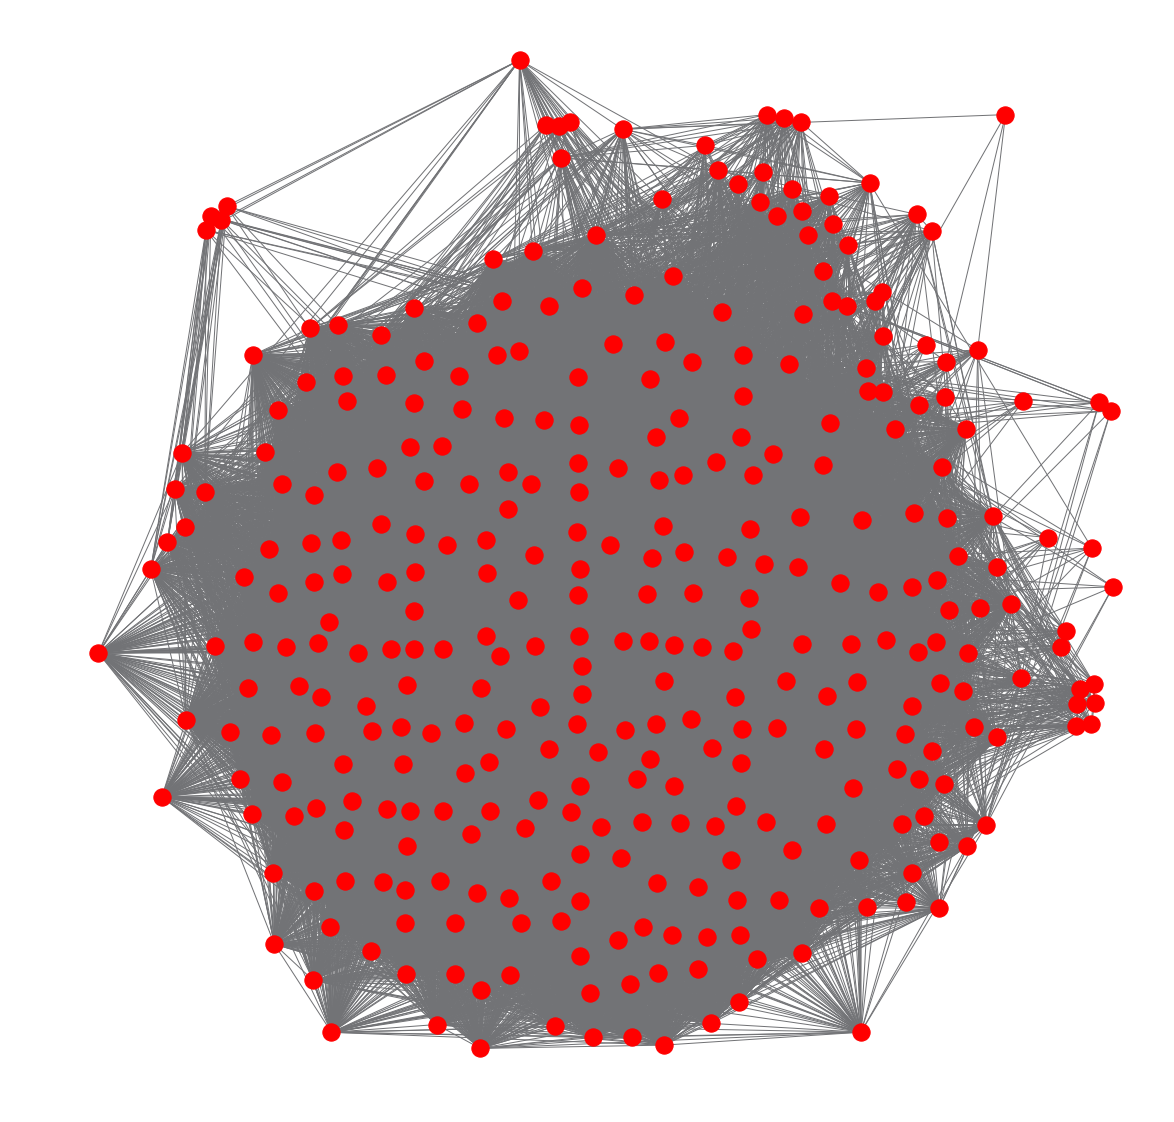

In [25]:
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(G, pos=positions, with_labels=False, edge_color="#727376")

In [26]:
len(G.nodes)

343